# [Scikit-learn](https://scikit-learn.org/stable/)

1. [Custering]().
2. [Classification]().
3. [Regression]().
4. [Dimensionality reduction]().

## Table of Contents:

1. [Install](#install).
2. [Linear regression](#LiR).
3. [Logistic regression](#LoR).
4. [Supervised clustering using KNN](#KNN).
5. [Supervised classification with SVM](#SVM).

## 1. Install <a class="anchor" id="install"></a>

In [ ]:
!pip3 install scikit-learn

## 2. Linear regression  <a class="anchor" id="LiR"></a>

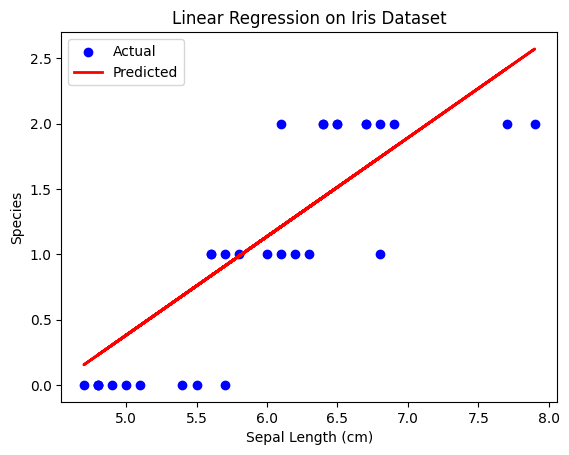

Mean Squared Error: 0.1979546681395589
R-squared: 0.7167580265093751


In [7]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
target = iris['target']

# Select the sepal length (cm) as the predictor variable (feature)
X = iris_df[['sepal length (cm)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Create a linear regression predictor and fit it to the training data
predictor = LinearRegression()
predictor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = predictor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the data points and the linear regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Species')
plt.title('Linear Regression on Iris Dataset')
plt.legend()
plt.show()

print("Mean Squared Error:", mse)
print("R-squared:", r2)

## 3. Logistic regression  <a class="anchor" id="LoR"></a>

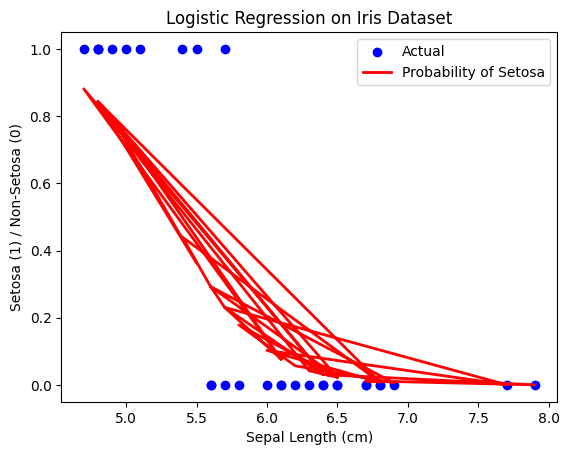

Accuracy: 0.9
Confusion Matrix:
[[20  0]
 [ 3  7]]


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
target = iris['target']

# Create binary target variable: setosa (1) vs. non-setosa (0)
target_binary = (target == 0).astype(int)

# Select the sepal length (cm) as the predictor variable (feature)
X = iris_df[['sepal length (cm)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target_binary, test_size=0.2, random_state=42)

# Create a logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the data points and the logistic regression decision boundary
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, model.predict_proba(X_test)[:, 1], color='red', linewidth=2, label='Probability of Setosa')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Setosa (1) / Non-Setosa (0)')
plt.title('Logistic Regression on Iris Dataset')
plt.legend()
plt.show()

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

## 4. Supervised clustering using KNN  <a class="anchor" id="KNN"></a>

In [7]:
import time
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from  sklearn.datasets import fetch_covtype
x, y = fetch_covtype(return_X_y=True)
# Data Set Information:
# Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).
# This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

# for sake of time is 1/4th of the data
subset = x.shape[0]//4
x = x[:subset,:]
y = y[:subset]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)

params = {
    'n_neighbors': 40,  
    'weights': 'distance',  
    'n_jobs': -1
}

start_time = time.time()
knn = KNeighborsClassifier(**params).fit(x_train, y_train) # Classifier selection + training
predicted = knn.predict(x_test) # Inference
patched_time = time.time() - start_time
print("Time to calculate \033[1m knn.predict scikit-learn {:4.1f}\033[0m seconds".format(patched_time))
report = metrics.classification_report(y_test, predicted)
print(f"Classification report for kNN:\n{report}\n")

Time to calculate  knn.predict in Patched scikit-learn  3.6 seconds
Classification report for kNN:
              precision    recall  f1-score   support

           1       0.93      0.86      0.89      6120
           2       0.94      0.98      0.96     20540
           3       0.84      0.46      0.60       428
           4       0.84      0.95      0.89       441
           5       0.86      0.64      0.73       631
           6       0.80      0.58      0.67       449
           7       0.84      0.87      0.85       442

    accuracy                           0.93     29051
   macro avg       0.86      0.76      0.80     29051
weighted avg       0.93      0.93      0.93     29051




## 5. Supervised classification with SVM  <a class="anchor" id="SVM"></a>

In [ ]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()